# Histogram
- Histogram is a visual representation of the distribution of a continous feature.
- Can also display the trend of the frequency.
- For images, can display the frequency of the colors (rgb - 0->255). Can plot three histograms over each other to see the colors. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
By passing the name of the image, the function returns the image in BGR and RGB format. One will be used to perform operations, the other for...
showing the image.
Second image is color corrected for matplotlib

'''
def get_image(name):
    image = cv2.imread(f'../Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/{name}')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return (image, image_rgb)

In [3]:
# An image is displayed using opencv
def show_image(image, color=None):
    plt.imshow(image, cmap=color)
    plt.show()

In [14]:
dark_horse, show_horse = get_image('horse.jpg')
rainbow, show_rainbow = get_image('rainbow.jpg')
blue_bricks, show_bricks = get_image('bricks.jpg')

Show histograms of the image

In [19]:
'''
- Pass a list of the images, 
- Pass the channles to show. By giving index 0, means first color in BGR. Meaning, blue.
- Mask: for just analyzing part of the image.
- Histsize: max value to show
- ranges: 0-256 because is up to, not including, 256
'''
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) 
hist_values.shape

(256, 1)

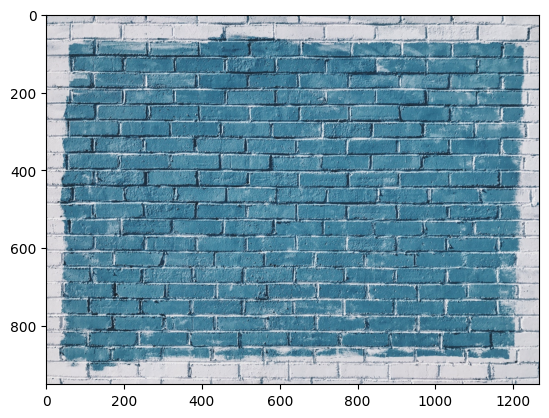

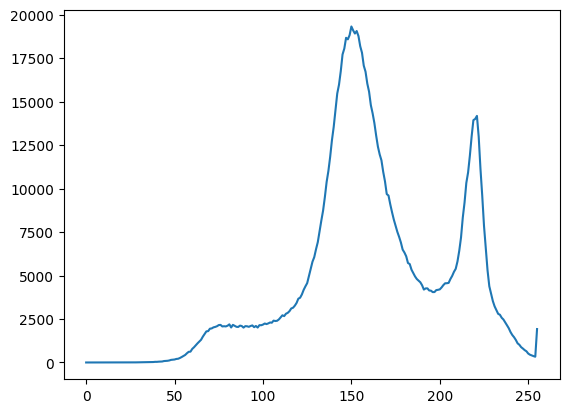

In [24]:
show_image(show_bricks)
plt.plot(hist_values) # here it shows that have a peak of the value of blue of 150 and 225. Meaning, those are the peaks of the intensity of blue in ...
                                # the image
plt.show()

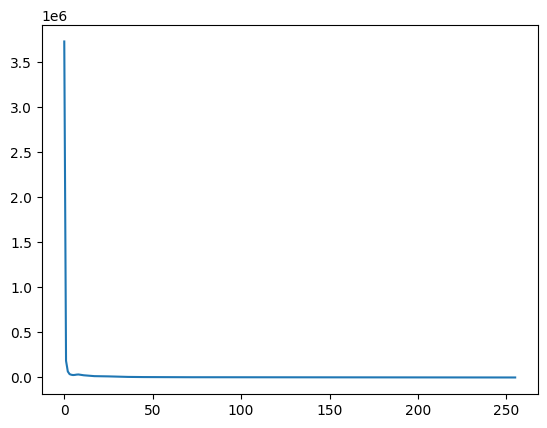

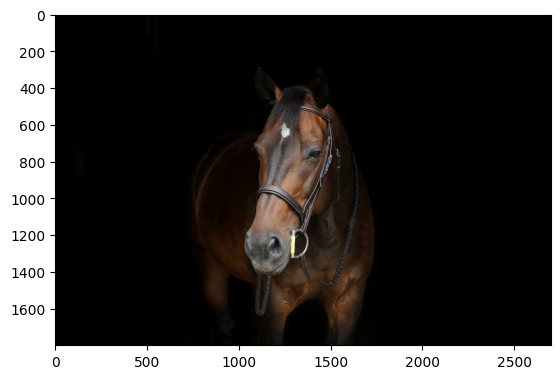

In [26]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) 
hist_values.shape

plt.plot(hist_values) # here shows almost all zero. makes sense because image was mostly black
plt.show()
show_image(show_horse)

Lets plot the three colors in the histogram

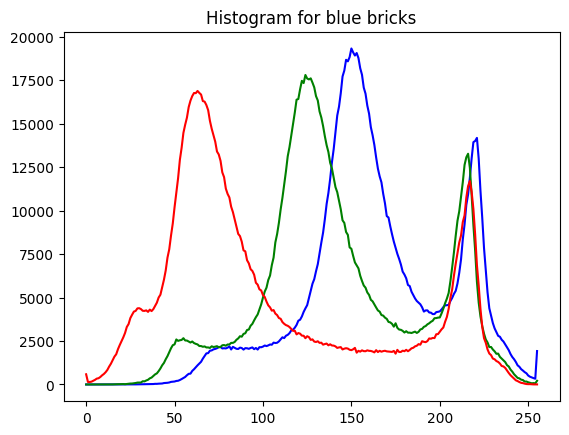

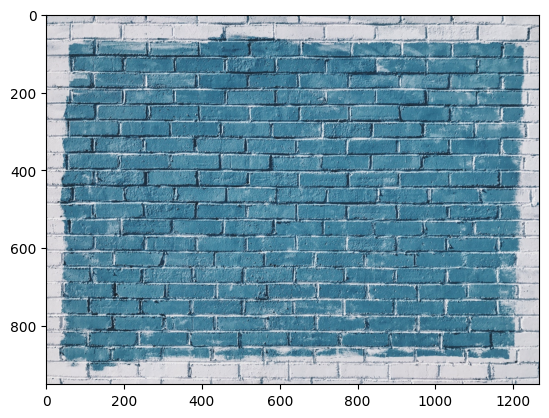

In [34]:
img = blue_bricks
color = ('b','g','r') # bgr
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], [indx], None, [256], [0,256])
    plt.plot(histr, color=color)
plt.title('Histogram for blue bricks')
plt.show()

show_image(show_bricks) # mainly have colors blue, so makes sense

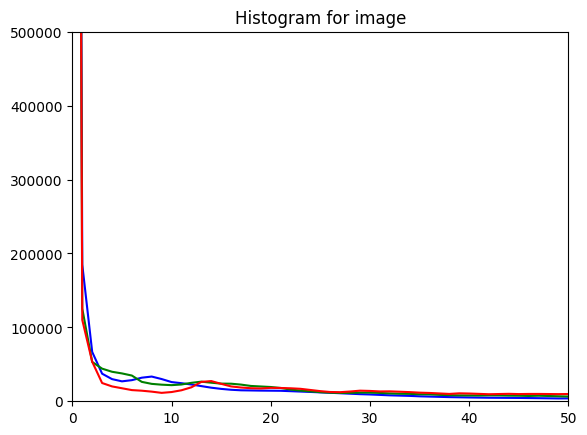

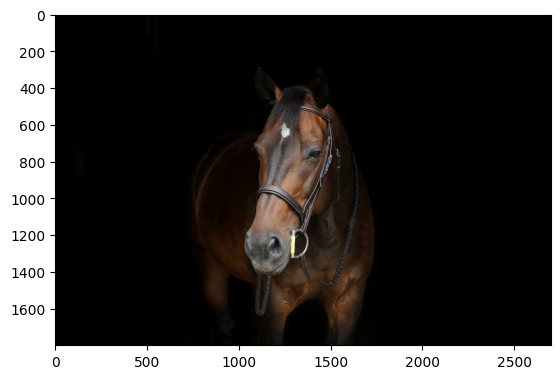

'\n\n'

In [41]:
img = dark_horse
color_image = show_horse
color = ('b','g','r') # bgr
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], [indx], None, [256], [0,256])
    plt.plot(histr, color=color)
    plt.xlim([0, 50])
    plt.ylim([0, 500000])
plt.title('Histogram for image')
plt.show()

show_image(color_image)
'''
See a bump around 10, but very little. Not much color. Because such a large image, pixel count distorts the image
'''

In [42]:
dark_horse.shape

(1800, 2700, 3)

In [45]:
'''
Distorts the image because most of these are black
'''
print('Amout of pixels in dark horse image is: ', (1800*2700*3))

Amout of pixels in dark horse image is:  14580000


## Histogram Masked portio image
- Can select a region of interest and only calcualte the color histogram of that mask

## Histogram Equalization
- Previously see how to use gamma correction to increase/decrease brightness of an image. Now we will se increase/decrease contrast image throguh histogram equalization. 
- Histogram equalizaiton takes min and max value of the color array and after applying equalization, the min value gets transfromed to zero and max value into 255. The contrast of all pixels increases. If in the histogram all the values where almost bundled together, then equalizatio will increase the sparcity of the values in the diagram. 

In [4]:
rainbow, show_rainbow = get_image('rainbow.jpg')


In [5]:
img = rainbow
img.shape

(550, 413, 3)

In [9]:
mask = np.zeros(img.shape[:2], np.uint8) # grabs only the x and y component

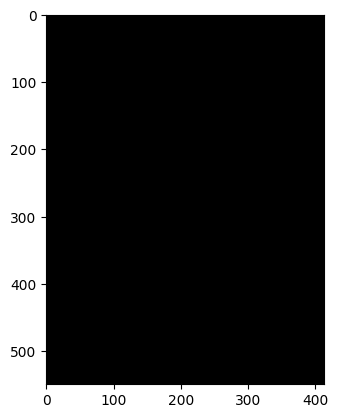

In [11]:
show_image(mask, color='gray')

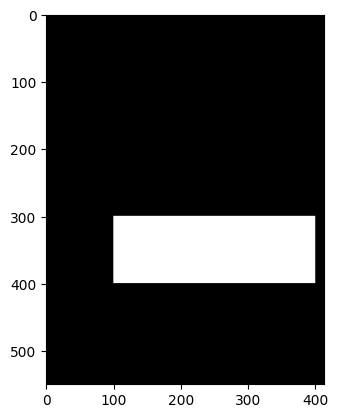

In [12]:
mask[300:400, 100:400] = 255
show_image(mask, color='gray')

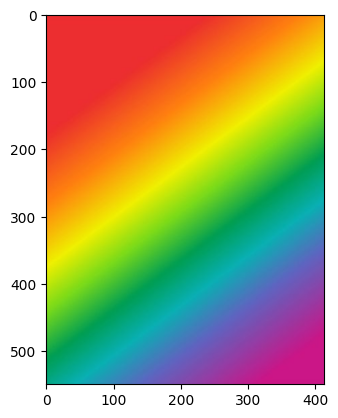

In [14]:
show_image(show_rainbow)

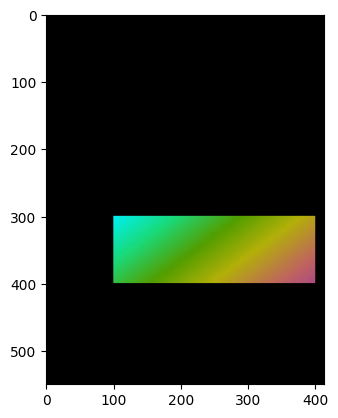

In [16]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_image(masked_img)

Only for visualization purposes

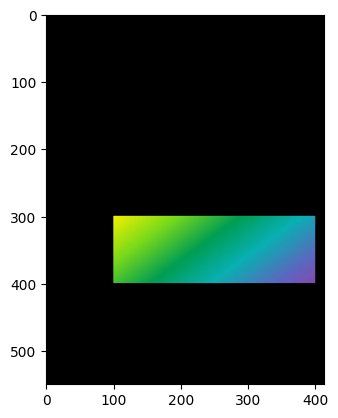

In [17]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)
show_image(show_masked_img)

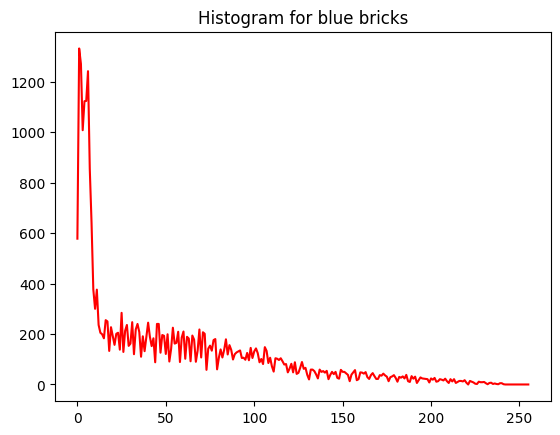

In [18]:
# Show the red channel, and form image above we should suspect that there is not much red
img = rainbow
# color = ('b','g','r') # bgr
color = ('r')
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
    plt.plot(histr, color=color)
plt.title('Histogram for blue bricks')
plt.show()

Now do the same as the code one cell above but without mask. From this, we see that one only considers the region of interest and the seocnd image now shows the whole image, which has more red. 

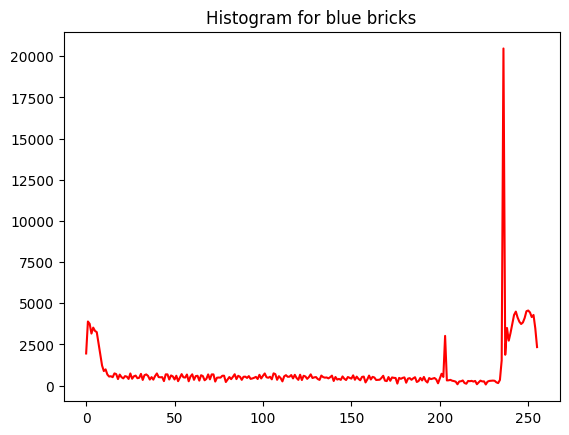

In [19]:
img = rainbow
# color = ('b','g','r') # bgr
color = ('r')
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], channels=[2], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histr, color=color)
plt.title('Histogram for blue bricks')
plt.show()

## Histogram Equalization
- Previously see how to use gamma correction to increase/decrease brightness of an image. Now we will se increase/decrease contrast image throguh histogram equalization. 
- Histogram equalizaiton takes min and max value of the color array and after applying equalization, the min value gets transfromed to zero and max value into 255. The contrast of all pixels increases. If in the histogram all the values where almost bundled together, then equalizatio will increase the sparcity of the values in the diagram.
- Now show histogram equalization for contrasting the images. 

In [26]:
def get_image(name):
    image = cv2.imread(f'../Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/{name}')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    return (image, image_rgb, gray_image)

In [33]:
gorilla, show_gorilla, gray_gorilla = get_image('gorilla.jpg')

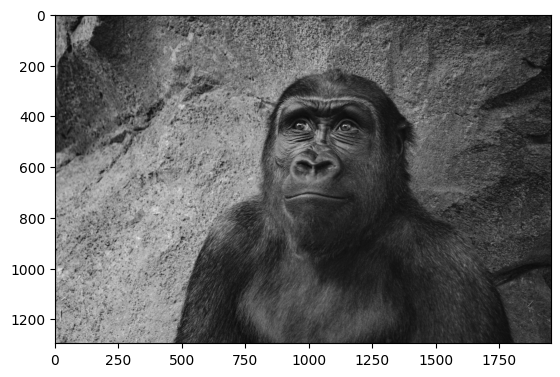

In [34]:
show_image(gray_gorilla, 'gray')

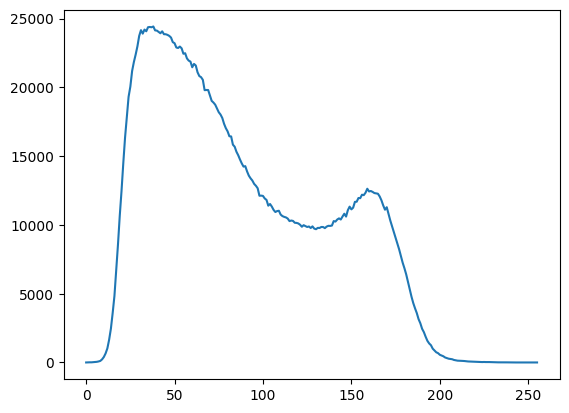

In [35]:
hist_values = cv2.calcHist([gray_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # use the zero channel because gray has only one channelw
plt.plot(hist_values)
plt.show()

## Results
Here the contrast is very visible compared to the previous image. Even more we see in the histogram that the values are more dispersed

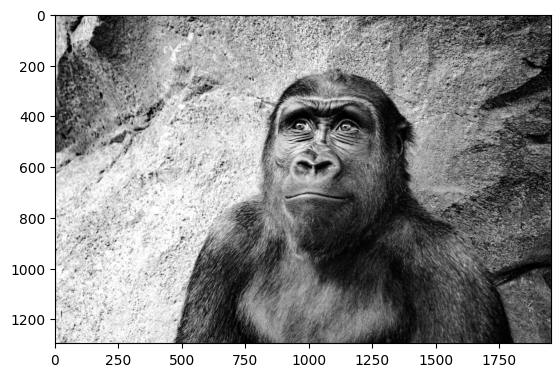

In [36]:
eq_gorilla = cv2.equalizeHist(gray_gorilla)
show_image(eq_gorilla, color='gray')

The decrease in this image is more shallower than in the previous histogram. A less quicker drop, and higher contrast

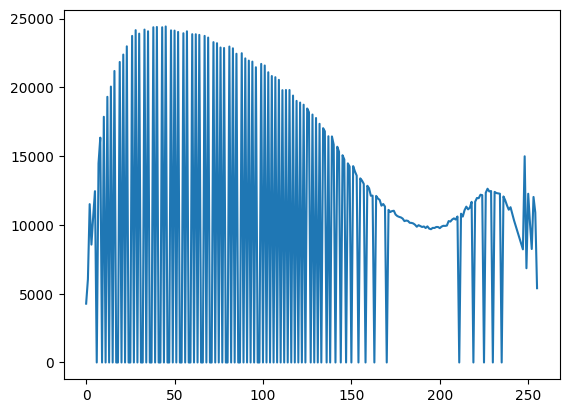

In [37]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # use the zero channel because gray has only one channelw
plt.plot(hist_values)
plt.show()

Here we show the equalizer applied to a color image. and the histograms before and after. 

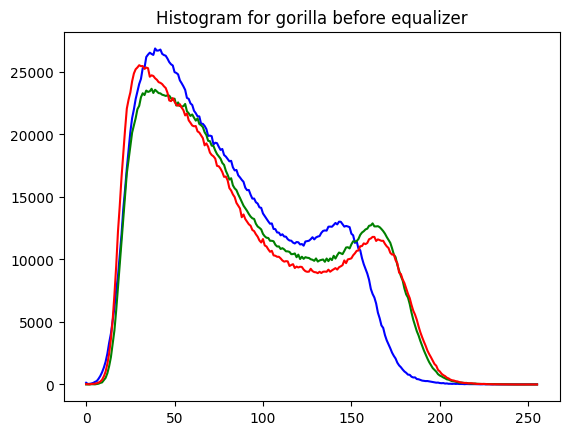

In [40]:
# Show histogram
img = gorilla
color = ('b','g','r') # bgr
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], channels=[indx], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histr, color=color)
plt.title('Histogram for gorilla before equalizer')
plt.show()

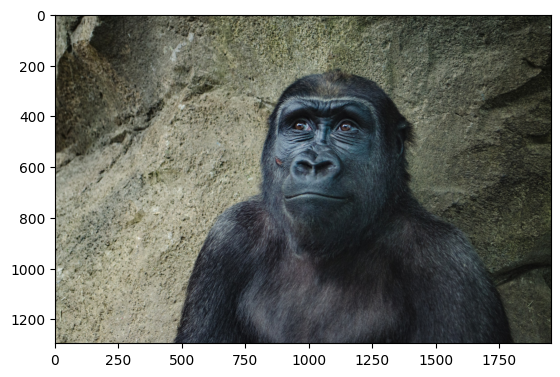

(1295, 1955, 3)

In [53]:
# need to transform an hsv version of the gorilla to apply an equalizer
gorilla, show_gorilla, gray_gorilla = get_image('gorilla.jpg')
show_image(show_gorilla)
hsv = cv2.cvtColor(gorilla, cv2.COLOR_BGR2HSV)
hsv.shape

In [50]:
print(hsv[:,:,2].min()) # the zero channel is the hue, the 1 channel is the saturation, and 2 is the value channel (that is our interest)

1


Here we can see more contrast than the image above. All this just by isolating value channel in HSV, applying qualized hist, and replacing the orignail values. And then converting it into RGB to show the image. 

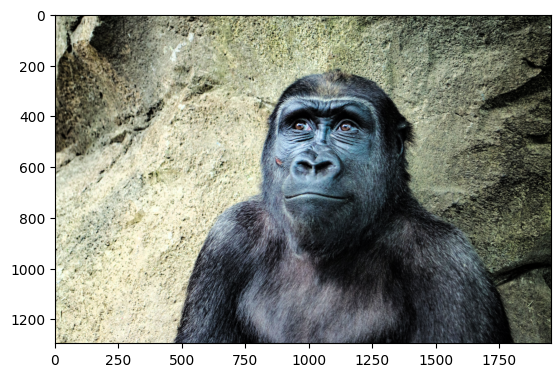

In [56]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2]) # replace that image value

eq_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
show_image(eq_gorilla)

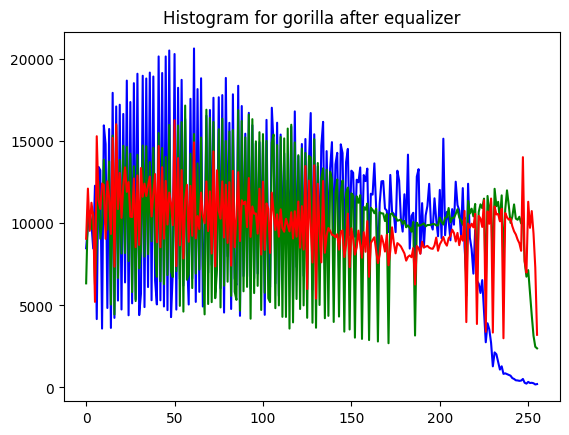

In [57]:
# Show histogram
img = cv2.cvtColor(eq_gorilla, cv2.COLOR_RGB2BGR)
color = ('b','g','r') # bgr
for indx, color in enumerate(color):
    histr = cv2.calcHist([img], channels=[indx], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histr, color=color)
plt.title('Histogram for gorilla after equalizer')
plt.show()